In [1]:
import pandas as pd
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 20)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df_regression = pd.read_excel("feature-eng-data/novel_regression_dataset.xlsx")
df_regression = df_regression.drop(df_regression.columns[0], axis=1)
df_regression = df_regression.set_index("CompanyNumber")

In [3]:
df_regression

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2CO2e
CompanyNumber,,,,,,,,,,,,,,,,
00019457,3152.0,603.300000,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10,10.0,9.000000,9.0,9.0,47.63
00024869,1048.0,486.000000,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10,9.0,8.000000,6.0,9.0,269.00
00029559,76060.0,291.200000,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2,1.0,5.000000,2.0,2.0,219927.00
00030226,584.0,104.600000,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2,2.0,2.000000,5.0,2.0,39186.00
00033774,4017.0,15700.000000,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1,2.0,1.000000,2.0,1.0,431311.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,381.0,37.473996,381.0,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5,5.0,5.000000,2.0,5.0,0.00
SC367563,1125.0,108.500000,1125.0,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8,5.0,5.000000,6.0,6.0,2272.20
SC419949,0.0,29.375452,0.0,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7,5.0,5.195021,2.0,6.0,771.00


In [4]:
features_list = df_regression.columns

In [5]:
df_regression

,AssetsM,TurnoverM,FTE,IR_CO2ePerAssetsM,IR_CO2ePerTurnoverM,IR_CO2ePerFTE,DefraRatio,NormalisedIrCO2ePerAssetsM,NormalisedIrCO2ePerTurnoverM,NormalisedIrCO2ePerFTE,ScoreC1a,ScoreC1t,ScoreC1f,ScoreC2,ScoreC1,S1S2CO2e
CompanyNumber,,,,,,,,,,,,,,,,
00019457,3152.0,603.300000,3152.0,0.060444,0.078988,0.015111,1.3750,88.414665,39.608,7.726939,10,10.0,9.000000,9.0,9.0,47.63
00024869,1048.0,486.000000,1048.0,0.253968,0.954733,0.442748,0.0375,88.414665,39.608,7.726939,10,9.0,8.000000,6.0,9.0,269.00
00029559,76060.0,291.200000,76060.0,516.260563,755.762887,2.891494,0.3750,88.414665,39.608,7.726939,2,1.0,5.000000,2.0,2.0,219927.00
00030226,584.0,104.600000,584.0,473.260870,373.200000,67.099315,6.6250,88.414665,39.608,7.726939,2,2.0,2.000000,5.0,2.0,39186.00
00033774,4017.0,15700.000000,4017.0,1866.017132,319.124586,1247.263132,3.8750,88.414665,39.608,7.726939,1,2.0,1.000000,2.0,1.0,431311.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC334329,381.0,37.473996,381.0,61.967019,33.135135,3.217848,0.0375,88.414665,39.608,7.726939,5,5.0,5.000000,2.0,5.0,0.00
SC367563,1125.0,108.500000,1125.0,5.116468,25.995413,2.518667,0.3750,88.414665,39.608,7.726939,8,5.0,5.000000,6.0,6.0,2272.20
SC419949,0.0,29.375452,0.0,20.503251,28.137931,0.000000,0.0375,88.414665,39.608,7.726939,7,5.0,5.195021,2.0,6.0,771.00


RF Regressor with 15 features

In [6]:
scaler = MinMaxScaler()
normalised_df_regression = scaler.fit_transform(df_regression)
S1S2CO2e = normalised_df_regression[:, -1]

# drop the label
normalised_df_regression = np.delete(normalised_df_regression, -1, axis=1)

In [7]:
normalised_df_regression.shape

(765, 15)

In [8]:
# Split training data and test data
X = normalised_df_regression
Y = S1S2CO2e

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=0)

print('Number of instances in X: {}'.format(np.shape(X)[0]))
print('Number of instances in X_train: {}'.format(X_train.shape[0]))
print('Number of instances in X_test: {}'.format(X_test.shape[0]))
print('Number of instances in X_train and X_test together: {}'.format(X_train.shape[0] + X_test.shape[0]))

poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
print(X_poly.shape)

Number of instances in X: 765
Number of instances in X_train: 535
Number of instances in X_test: 230
Number of instances in X_train and X_test together: 765
(765, 136)


3/3 [==============================] - 0s 551us/step


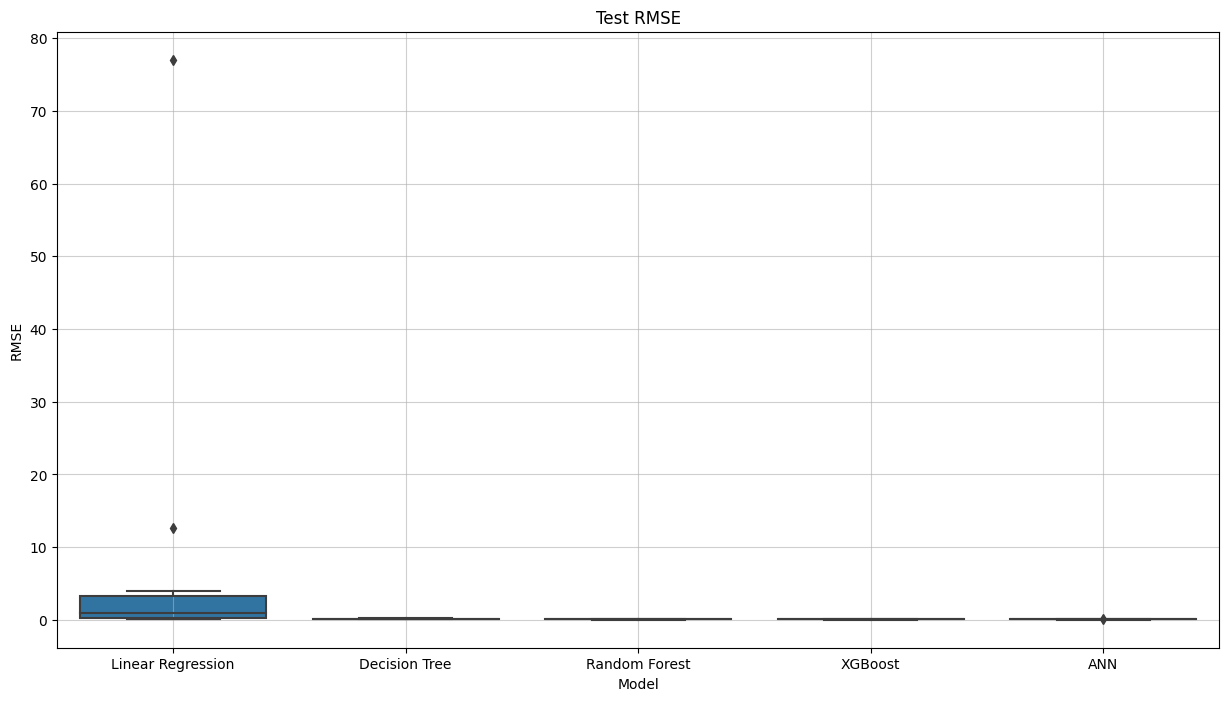

RMSE and R2 Scores
                     Train RMSE  Train R2-Score  Test RMSE  Test R2-Score
Model name                                                               
ANN                7.666075e-02        0.539135   0.086671       0.034955
Decision Tree      8.307264e-11        1.000000   0.135543      -0.230735
Linear Regression  8.356454e-02        0.468788   9.783899      -0.499176
Random Forest      3.870571e-02        0.898552   0.093038       0.015546
XGBoost            8.614120e-04        0.999963   0.105528      -0.117779


In [9]:
def plot_regressors(X, y):
    
    models = [
        LinearRegression(),
        DecisionTreeRegressor(random_state=0),
        RandomForestRegressor(random_state=0),
        XGBRegressor(random_state=0)
    ]
    
    # Define ANN model
    def build_ann():
        model = Sequential()
        model.add(Dense(units=16, activation='relu', input_shape=(X.shape[1],)))
        model.add(Dense(units=8, activation='relu'))
        model.add(Dense(units=1))
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model
    
    models.append(build_ann())
    
    names = ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost", "ANN"]

    entries_train = []
    entries_test = []

    kf = KFold(n_splits=10, shuffle=False)

    for train_index, test_index in kf.split(X):
        
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        for idx, model in enumerate(models):
            model_name = names[idx]

            # Train the ANN model
            if model_name == "ANN":
                model.fit(X_train_fold, y_train_fold, epochs=50, verbose=0, batch_size=32)
            else:
                model.fit(X_train_fold, y_train_fold)
                
            y_train_pred_fold = model.predict(X_train_fold)

            # RMSE and R2 score on training set
            train_rmse = np.sqrt(mean_squared_error(y_train_pred_fold, y_train_fold))
            r2_train = r2_score(y_train_pred_fold, y_train_fold)
            entries_train.append((model_name, train_rmse, r2_train))
            train_scores = pd.DataFrame(entries_train, columns=["Model name", "Train RMSE", "Train R2-Score"])
            
            y_test_pred_fold = model.predict(X_test_fold)

            # RMSE and R2 score on the test set
            test_rmse = np.sqrt(mean_squared_error(y_test_pred_fold, y_test_fold))
            r2_test = r2_score(y_test_pred_fold, y_test_fold)
            entries_test.append((model_name, test_rmse, r2_test))
            test_scores = pd.DataFrame(entries_test, columns=["Model name", "Test RMSE", "Test R2-Score"])

    # Getting the test RMSE values for each model
    test_scores_LR = test_scores[test_scores['Model name'] == 'Linear Regression']['Test RMSE'].values.tolist()
    test_scores_DT = test_scores[test_scores['Model name'] == 'Decision Tree']['Test RMSE'].values.tolist()
    test_scores_RF = test_scores[test_scores['Model name'] == 'Random Forest']['Test RMSE'].values.tolist()
    test_scores_XGB = test_scores[test_scores['Model name'] == 'XGBoost']['Test RMSE'].values.tolist()
    test_scores_ANN = test_scores[test_scores['Model name'] == 'ANN']['Test RMSE'].values.tolist()
    test_rmse = [test_scores_LR, test_scores_DT, test_scores_RF, test_scores_XGB, test_scores_ANN]

    fig, ax = plt.subplots(figsize=(15,8))
    sns.boxplot(data=test_rmse)
    plt.xticks(range(len(test_rmse)), names)
    plt.xlabel('Model')
    plt.title('Test RMSE')
    plt.ylabel('RMSE')
    plt.grid(alpha=0.6)
    plt.show()

    train_and_test_df = pd.merge(train_scores.groupby('Model name').mean(), test_scores.groupby('Model name').mean(), on = 'Model name', how = 'outer')
    print("RMSE and R2 Scores")
    print(train_and_test_df)

plot_regressors(X_poly, Y)
